## 1. Introduction

Our datasource is derived from the United States Department of Agriculture website.(https://fdc.nal.usda.gov/download-datasets.html)
The aim of this project was to analyze a database of packaged American foods for their brands, store availability, nutritional values, calories etc.
The libraries used for our analysis are pandas, numpy, sklearn, matplotlib, plotly and wordcloud.

#### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### An overview of the data

In [3]:
branded = pd.read_csv('branded_food.csv')
food = pd.read_csv('food.csv')
fn = pd.read_csv('food_nutrient.csv')
nutrient = pd.read_csv('nutrient.csv')

branded.head() # The main table

fdc_id brand_owner      gtin_upc  \
0  344604    Red Gold   72940755050   
1  344605    Red Gold   72940755043   
2  344606     Cargill  642205534517   
3  344607     Cargill  642205510276   
4  344608     Cargill  642205534500   

                                         ingredients  serving_size  \
0  Tomatoes, Tomato Juice, Less Than 2% Of: Salt,...         123.0   
1  Tomatoes, Tomato Juice, Less Than 2% Of: Salt,...         123.0   
2                    White Turkey, Natural Flavoring         112.0   
3                   Turkey Breast, Natural Flavoring         112.0   
4                         Turkey, natural Flavoring.         112.0   

  serving_size_unit household_serving_fulltext branded_food_category  \
0                 g                    1/2 cup                   NaN   
1                 g                    1/2 cup                   NaN   
2                 g                      4 oz.                   NaN   
3                 g                      4 oz.                   NaN   
4                 g                      4 oz.                   NaN   

  data_source modified_date available_date market_country  discontinued_date  
0        GDSN    2018-04-26     2019-04-01  United States                NaN  
1        GDSN    2018-04-26     2019-04-01  United States                NaN  
2        GDSN    2016-06-13     2019-04-01  United States                NaN  
3        GDSN    2016-06-07     2019-04-01  United States                NaN  
4        GDSN    2016-06-08     2019-04-01  United States                NaN

In [4]:
branded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498182 entries, 0 to 498181
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   fdc_id                      498182 non-null  int64  
 1   brand_owner                 496326 non-null  object 
 2   gtin_upc                    498182 non-null  object 
 3   ingredients                 495643 non-null  object 
 4   serving_size                484016 non-null  float64
 5   serving_size_unit           484016 non-null  object 
 6   household_serving_fulltext  481115 non-null  object 
 7   branded_food_category       487728 non-null  object 
 8   data_source                 498182 non-null  object 
 9   modified_date               498162 non-null  object 
 10  available_date              498182 non-null  object 
 11  market_country              498182 non-null  object 
 12  discontinued_date           0 non-null       float64
dtypes: float64(2),

Our database is made of

In [5]:
sh = branded.shape
print(f"{sh[0]} rows and {sh[1]} columns")

498182 rows and 13 columns


In [6]:
# Number of data sources:
print(len(branded['data_source'].unique()),"unique data sources.")

2 unique data sources.


In [7]:
# Number of companies:
print(len(branded['brand_owner'].unique()),"unique companies in our database with ")

29025 unique companies in our database with 


In [8]:
#Number of products:
print(len(branded['fdc_id'].unique()),"unique products.")

498182 unique products.


The products are divided into

In [9]:
# Number of food categories:
print(len(branded['branded_food_category'].unique()),"unique food categories")

240 unique food categories


In total, there are

In [10]:
print(len(nutrient['name'].unique()),"unique nutrients with all our food categories combined.")

236 unique nutrients with all our food categories combined.


In [11]:
#Wordcloud based on the number of products per company
def word_clouds_freq(func_name):
    func_name.index = func_name.index.map(str)
    wrdcld = WordCloud(width= 1500,height= 800).generate_from_frequencies(func_name)
    plt.figure(figsize=(20,10))
    plt.imshow(wrdcld)
    plt.axis("off")
    plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

### Market competition

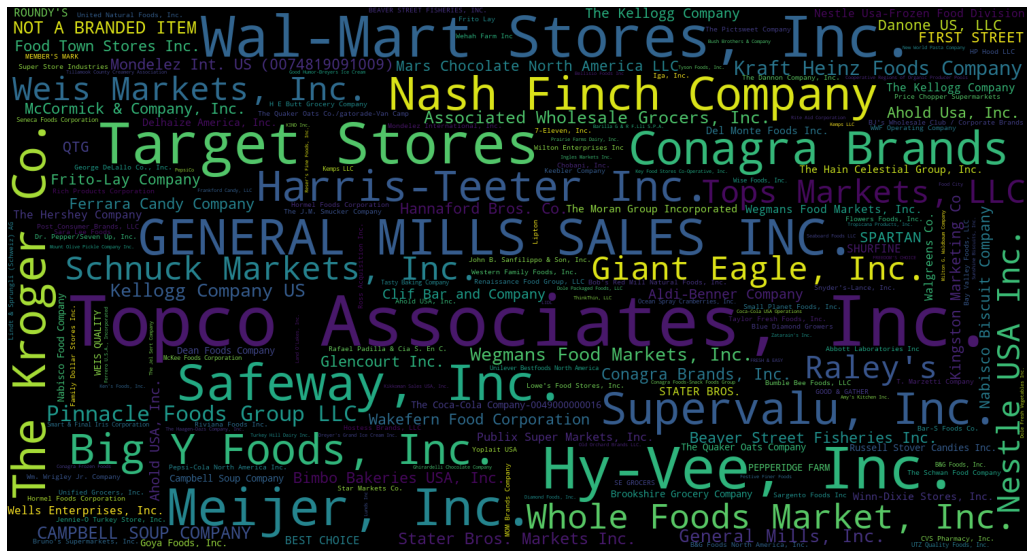

In [12]:
#Numerical Analysis
num_prod = branded['brand_owner'].value_counts()
num_prod.head(10)

word_clouds_freq(num_prod)

#### From the analysis above, Topco, Hy-Vee, Inc. General Mills, Wal-Mart Stores, Inc. are all biggest vendors. Krogers, Conagra Brands, Meijer and safeway are the medium sized vendors.

<br>

#### Understanding the competitiveness of the top food categories

First we count the number of product owned by each company, for each food category.

In [13]:
counts = branded.groupby(['branded_food_category', 'brand_owner']).count().iloc[:, :1].unstack(level=0)
counts.head()

fdc_id                                  \
branded_food_category        Alcohol Alcoholic Beverages All Noodles   
brand_owner                                                            
 ANCIENT IN GRAINED SNACK CO     NaN                 NaN         NaN   
 DOS HERMANOS S.A.               NaN                 NaN         NaN   
 MANAGEA                         NaN                 NaN         NaN   
 NO MANUFACTURER                 NaN                 NaN         NaN   
!AJUA!                           NaN                 NaN         NaN   

                                                                             \
branded_food_category        Amino Acid Supplements Antioxidant Supplements   
brand_owner                                                                   
 ANCIENT IN GRAINED SNACK CO                    NaN                     NaN   
 DOS HERMANOS S.A.                              NaN                     NaN   
 MANAGEA                                        NaN                     NaN   
 NO MANUFACTURER                                NaN                     NaN   
!AJUA!                                          NaN                     NaN   

                                                                                       \
branded_food_category        Aquatic Invertebrates/Fish/Shellfish/Seafood Combination   
brand_owner                                                                             
 ANCIENT IN GRAINED SNACK CO                                                NaN         
 DOS HERMANOS S.A.                                                          NaN         
 MANAGEA                                                                    NaN         
 NO MANUFACTURER                                                            NaN         
!AJUA!                                                                      NaN         

                                                           \
branded_food_category        Baby/Infant  Foods/Beverages   
brand_owner                                                 
 ANCIENT IN GRAINED SNACK CO                          NaN   
 DOS HERMANOS S.A.                                    NaN   
 MANAGEA                                              NaN   
 NO MANUFACTURER                                      NaN   
!AJUA!                                                NaN   

                                                                               \
branded_food_category        Bacon, Sausages & Ribs Baking Baking Accessories   
brand_owner                                                                     
 ANCIENT IN GRAINED SNACK CO                    NaN    NaN                NaN   
 DOS HERMANOS S.A.                              NaN    NaN                NaN   
 MANAGEA                                        NaN    NaN                NaN   
 NO MANUFACTURER                                NaN    NaN                NaN   
!AJUA!                                          NaN    NaN                NaN   

                              ...  \
branded_food_category         ...   
brand_owner                   ...   
 ANCIENT IN GRAINED SNACK CO  ...   
 DOS HERMANOS S.A.            ...   
 MANAGEA                      ...   
 NO MANUFACTURER              ...   
!AJUA!                        ...   

                                                                             \
branded_food_category        Vegetables - Prepared/Processed (Shelf Stable)   
brand_owner                                                                   
 ANCIENT IN GRAINED SNACK CO                                            NaN   
 DOS HERMANOS S.A.                                                      NaN   
 MANAGEA                                                                NaN   
 NO MANUFACTURER                                                        NaN   
!AJUA!                                                                  NaN   

                                       

Then we find the 100 food categories with the most products.

In [14]:
cat_counts = branded.groupby('branded_food_category').count().iloc[:, 1]
top_cats = cat_counts.sort_values(ascending=False).iloc[:100]
top_cats

branded_food_category
Popcorn, Peanuts, Seeds & Related Snacks          21898
Candy                                             21729
Cheese                                            19387
Ice Cream & Frozen Yogurt                         15506
Cookies & Biscuits                                13891
                                                  ...  
All Noodles                                        1068
Gravy Mix                                          1062
French Fries, Potatoes & Onion Rings               1039
Biscuits/Cookies (Shelf Stable)                    1024
Meat/Poultry/Other Animals  Prepared/Processed     1005
Name: brand_owner, Length: 100, dtype: int64

Next we create a dictionary with the top categories as keys, and the percentage of products owned by the top 5 companies in each category as values. We also include the total number of products per category, in order to have an idea of the market size in each category.

In [15]:
d={}
for j in counts.columns:
    if j[1] in top_cats:
        d[j[1]] = (counts[j].sort_values(ascending=False).iloc[:5].sum()/ counts[j].sort_values(ascending=False).sum(),
                   top_cats[j[1]])
    else:
        continue

d

{'All Noodles': (0.19288389513108614, 1068),
 'Bacon, Sausages & Ribs': (0.1548140043763676, 1828),
 'Baking Decorations & Dessert Toppings': (0.24778141055581504, 4282),
 'Biscuits/Cookies': (0.9813457694870087, 1501),
 'Biscuits/Cookies (Shelf Stable)': (1.0, 1024),
 'Bread & Muffin Mixes': (0.16109873793615442, 1347),
 'Breads & Buns': (0.2310898827616153, 11515),
 'Butter & Spread': (0.17532467532467533, 2156),
 'Cake, Cookie & Cupcake Mixes': (0.24294954721862871, 3865),
 'Cakes, Cupcakes, Snack Cakes': (0.25737910822692067, 9554),
 'Candy': (0.2121128445855769, 21729),
 'Canned & Bottled Beans': (0.21715371822285578, 4209),
 'Canned Condensed Soup': (0.3039492242595205, 1418),
 'Canned Fruit': (0.2753831417624521, 4176),
 'Canned Seafood': (0.24178895877009085, 1431),
 'Canned Soup': (0.22719087635054022, 3332),
 'Canned Tuna': (0.4479674796747967, 1230),
 'Canned Vegetables': (0.2113289760348584, 5508),
 'Cereal': (0.2690462483208597, 10422),
 'Cheese': (0.15752824057358022, 193

Finally, we put this data in a table.

In [16]:
df_competition = pd.DataFrame({"Category":d.keys(), 
                               "Percentage":[round(i[0]*100) for i in d.values()], 
                               "TotalNumOfProducts":[i[1] for i in d.values()]})

df_competition.head()

Category  Percentage  TotalNumOfProducts
0                            All Noodles          19                1068
1                 Bacon, Sausages & Ribs          15                1828
2  Baking Decorations & Dessert Toppings          25                4282
3                       Biscuits/Cookies          98                1501
4        Biscuits/Cookies (Shelf Stable)         100                1024

Now let's plot the most competitive categories, meaning the ones with the lowest percentage of products owned by the top 5 companies.

In [17]:
px.bar(data_frame=df_competition.sort_values(by='Percentage', ascending=False).iloc[-10:], 
       x='Percentage', y='Category',
       title="Most Competitive Categories", labels={'Percentage':'Percentage of products owned by Top-5 companies'})


And now the least competitive categories, where the percentage of products owned by the top 5 companies is very high.

In [18]:
px.bar(data_frame=df_competition.sort_values(by='Percentage', ascending=True).iloc[-10:], 
        x='Percentage', y='Category',
        title="Least Competitive Categories", labels={'Percentage':'Percentage of products owned by Top-5 companies'})


The following scatter plot shows all the categories with their respective ownership percentage of the top five categories on axis x, and the total number of products in the category on axis y.

In [19]:
px.scatter(data_frame=df_competition, y='TotalNumOfProducts', x='Percentage', 
            labels={'Percentage': 'Percentage of products owned by the top-5 companies in the given category'},
            hover_name='Category')


It seems that from the biggest categories in terms of total number of products, the most competitive one is the **'Popcorn, Peanuts, Seeds & Related Snacks'.** It has almost 22000 products and only around 14% is owned by the top-5 companies.

## 2. Cleaning and Preprocessing the data

### I. Missing Values

#### Dealing with missing values
The missing values in ‘branded’ dataframe are mostly in branded_food_category. We tried to separate the ingredients of each food, and pick the 1st ingredient to categorise each missing food category. This method worked for some foods but did not yield good results for all of the food items. In the end, since the number of missing values is less than 1% of the total values in the dataset, we decided to drop the missing values. Below we check each table.

In [58]:
nutrient.isnull().sum()

id              0
name            0
unit_name       0
nutrient_nbr    0
rank            1
dtype: int64

In the table **nutrient** the columns that we will use are *id*, *name* and *unit_name*. None of these columns contain missing values.

In [59]:
nutrient = nutrient[['id', 'name', 'unit_name']]

<br>

In [60]:
food.isnull().sum()

fdc_id                   0
data_type                0
description              1
food_category_id    526529
publication_date         0
dtype: int64

In the table **food** we will need the columns *fdc_id* and *description*. Only one description is missing and we can drop that without affecting the integrity of the data.

<br>

In [61]:
fn.isnull().sum()

id                         0
fdc_id                     0
nutrient_id                0
amount                     0
data_points          6807832
derivation_id         642147
min                  7441935
max                  7441933
median               7538224
footnote             7547577
min_year_acquired    7523807
dtype: int64

In the table **food_nutrient** we will only need the columns *fdc_id*, *nutrient_id* and *amount*. No missing values are contained in these columns.

<br>

In [62]:
branded.isnull().sum()

fdc_id                             0
brand_owner                     1856
gtin_upc                           0
ingredients                     2539
serving_size                   14166
serving_size_unit              14166
household_serving_fulltext     17067
branded_food_category          10454
data_source                        0
modified_date                     20
available_date                     0
market_country                     0
discontinued_date             498182
dtype: int64

In the table **branded_food**  we will use the columns *fdc_id*, *brand_owner*, *ingredients*, *serving_size*, *serving_size_unit* and *branded_food_category*. In order to determine the significance of the number of missing values in these columns it would be useful to see it as a percentage of the total number of rows.

In [63]:
branded = branded[['fdc_id', 'brand_owner', 'ingredients', 'serving_size', 'serving_size_unit', 'branded_food_category']]
branded.isnull().sum()/len(branded)

fdc_id                   0.000000
brand_owner              0.003726
ingredients              0.005097
serving_size             0.028435
serving_size_unit        0.028435
branded_food_category    0.020984
dtype: float64

The percentages are very low. The columns *brand_owner*, *ingredients* and *branded_food_category* are all non-numerical columns, therefore it would be hard to find a valid way to impute the missing values. The columns *serving_size* and *serving_size_unit* will only be used in the machine learning model and we will deal with their missing values at that section. For now we will only drop the rows containing missing values in the non-numerical columns.

In [64]:
branded = branded.dropna(axis=0, subset=['brand_owner', 'ingredients', 'branded_food_category'])

<br>

### II. Joining the tables

Since every food contains many nutrients, the table **food_nutrient** contains several rows for the same food. In order to keep one row per food in our final table, we will create a column that will contain all the nutrients of each food along with their amounts and units. To achieve this we turn the **nutrient** table into a dictionary with the nutrient IDs as keys and tuples containing the nutrient names and units of measurment as values.

In [65]:
nutrients_dict = dict(zip(nutrient['id'], tuple(zip(nutrient['name'], nutrient['unit_name']))))

First we join the tables **food** and **branded_food**. Then we join the resulting table with the **food_nutrient** one.

In [66]:
df = branded.join(food.set_index('fdc_id'), on = 'fdc_id', how='left')
dff = fn.join(df.set_index('fdc_id'), on='fdc_id', how='inner')

For the second join we use 'inner' to exclude any foods that are not present in the **food_nutrient** table. As shown below there are about 14000 foods for which we don't have any information about their nutrients.

In [68]:
len(list(set(branded.fdc_id) - set(fn.fdc_id)))

14232

Next we create a column in our dataframe that will contain a tuple with the nutrient id and the amount.

In [69]:
dff['nutr_amnt'] = list(zip(dff.nutrient_id, dff.amount))

In order to have one row per food we need to group by fdc_id and put all the nutrient information of each food in a list. We will only keep the *fdc_id* and *nutr_amnt* columns, since we'll join the other columns later.

In [72]:
dff = dff[['fdc_id', 'nutr_amnt']].groupby('fdc_id')['nutr_amnt'].apply(list)
dff.head()

fdc_id
344609    [(1003, 3.9), (1004, 9.8), (1005, 72.7), (1007...
344610    [(1003, 3.7), (1004, 9.4), (1005, 73.1), (1007...
344611    [(1003, 3.9), (1004, 9.7), (1005, 73.0), (1007...
344612    [(1003, 11.5), (1004, 26.4), (1005, 57.0), (10...
344613    [(1003, 11.5), (1004, 26.4), (1005, 57.0), (10...
Name: nutr_amnt, dtype: object

Now we need to extract the nutrient names and their units of measurement from the dictionary we defined in the beginning. For this we'll create a function.

In [88]:
def get_nutrient_name(nutrient_list): # the input is a list of tuples, like the aggregated nutr_amnt column
    new_nutrient_d = {}
    for tup in nutrient_list: # the first element of each tuple is the fdc_id and the second is the amount
        name = nutrients_dict[tup[0]][0] # in the dictionary values the first element is the nutrient name
        unit = nutrients_dict[tup[0]][1] # and the second element is the unit of measurement
        new_nutrient_d[name] =  (tup[1], unit)
    return new_nutrient_d

In the dictionary returned by the function, the keys are the nutrient names, and the values are a tuple of the amount and the measurement unit. We apply this function on dff.m

In [89]:
dff = dff.apply(get_nutrient_name)
dff.head()

fdc_id
344609    {'Protein': (3.9, 'G'), 'Total lipid (fat)': (...
344610    {'Protein': (3.7, 'G'), 'Total lipid (fat)': (...
344611    {'Protein': (3.9, 'G'), 'Total lipid (fat)': (...
344612    {'Protein': (11.5, 'G'), 'Total lipid (fat)': ...
344613    {'Protein': (11.5, 'G'), 'Total lipid (fat)': ...
Name: nutr_amnt, dtype: object

Lastly we join the above series with the **df** dataframe which contains the rest of the columns

In [90]:
df = df.join(dff, on='fdc_id', how='inner')
df.head()

fdc_id         brand_owner  \
5  344609  Kellogg Company US   
6  344610  Kellogg Company US   
7  344611  Kellogg Company US   
8  344612  Kellogg Company US   
9  344613  Kellogg Company US   

                                         ingredients  serving_size  \
5  ENRICHED FLOUR (WHEAT FLOUR, NIACIN, REDUCED I...          50.0   
6  ENRICHED FLOUR (WHEAT FLOUR, NIACIN, REDUCED I...          52.0   
7  ENRICHED FLOUR (WHEAT FLOUR, NIACIN, REDUCED I...          52.0   
8  Enriched flour (wheat flour, niacin, reduced i...          30.0   
9  Enriched flour (wheat flour, niacin, reduced i...          30.0   

  serving_size_unit                 branded_food_category     data_type  \
5                 g  Pies/Pastries - Sweet (Shelf Stable)  branded_food   
6                 g  Pies/Pastries - Sweet (Shelf Stable)  branded_food   
7                 g  Pies/Pastries - Sweet (Shelf Stable)  branded_food   
8                 g       Biscuits/Cookies (Shelf Stable)  branded_food   
9                 g       Biscuits/Cookies (Shelf Stable)  branded_food   

                                     description  food_category_id  \
5         KELLOGG'S POP-TARTS WILD CHERRY 14.1OZ               NaN   
6  Kellogg's Pop-Tarts Frosted Strawberry 14.7oz               NaN   
7      KELLOGG POP-TARTS FROSTED STRAWBERRY 22OZ               NaN   
8        Sunshine Cheez-It Crackers Original 3oz               NaN   
9        Sunshine Cheez-It Crackers Original 3oz               NaN   

  publication_date                                          nutr_amnt  
5       2019-04-01  {'Protein': (3.9, 'G'), 'Total lipid (fat)': (...  
6       2019-04-01  {'Protein': (3.7, 'G'), 'Total lipid (fat)': (...  
7       2019-04-01  {'Protein': (3.9, 'G'), 'Total lipid (fat)': (...  
8       2019-04-01  {'Protein': (11.5, 'G'), 'Total lipid (fat)': ...  
9       2019-04-01  {'Protein': (11.5, 'G'), 'Total lipid (fat)': ...

For some of the most common nutrients, we can create their own columns

In [91]:
df['calories'] = df['nutr_amnt'].apply(lambda x: x['Energy'][0] if 'Energy' in x.keys() else 0)
df['protein'] = df['nutr_amnt'].apply(lambda x: x['Protein'][0] if 'Protein' in x.keys() else 0)
df['fiber'] = df['nutr_amnt'].apply(lambda x: x['Fiber, total dietary'][0] if 'Fiber, total dietary' in x.keys() else 0)
df['sugars'] = df['nutr_amnt'].apply(lambda x: x['Sugars, total including NLEA'][0] if 'Sugars, total including NLEA' in x.keys() else 0)
df['fat'] = df['nutr_amnt'].apply(lambda x: x['Total lipid (fat)'][0] if 'Total lipid (fat)' in x.keys() else 0)
df['folic_acid'] = df['nutr_amnt'].apply(lambda x: x['Folic acid'][0] if 'Folic acid' in x.keys() else 0)

In [93]:
df.iloc[:10, 10:]

nutr_amnt  calories  protein  \
5   {'Protein': (3.9, 'G'), 'Total lipid (fat)': (...       0.0      3.9   
6   {'Protein': (3.7, 'G'), 'Total lipid (fat)': (...       0.0      3.7   
7   {'Protein': (3.9, 'G'), 'Total lipid (fat)': (...       0.0      3.9   
8   {'Protein': (11.5, 'G'), 'Total lipid (fat)': ...       0.0     11.5   
9   {'Protein': (11.5, 'G'), 'Total lipid (fat)': ...       0.0     11.5   
10  {'Protein': (9.0, 'G'), 'Total lipid (fat)': (...       0.0      9.0   
11  {'Protein': (9.0, 'G'), 'Total lipid (fat)': (...       0.0      9.0   
12  {'Protein': (12.4, 'G'), 'Total lipid (fat)': ...       0.0     12.4   
13  {'Protein': (6.4, 'G'), 'Total lipid (fat)': (...       0.0      6.4   
14  {'Protein': (3.9, 'G'), 'Total lipid (fat)': (...       0.0      3.9   

    fiber  sugars   fat  folic_acid  
5     1.3    30.7   9.8         0.0  
6     1.2    31.7   9.4         0.0  
7     1.3    31.7   9.7         0.0  
8     1.9     0.5  26.4       103.0  
9     1.9     0.5  26.4       103.0  
10    2.1     1.0  25.7       105.0  
11    2.1     1.0  25.7       105.0  
12    5.9     1.1  15.6        68.0  
13    3.5    29.9  21.3         0.0  
14    1.4    29.9   9.7         0.0

<br>

## 3. Health Impact Analysis

Food and Health relation is not a mystery, we all know that our body needs balance to be healthy. This balance depends on each of us, from our feeding behaviour to diseases. : make the difference between healthy ingredients and the other to pay attention to.

Dealing with deficiency & excess : 
According to the World Health Organization, a healthy diet, fat should not exceed 30% of our global consumption within 10% of saturated fat and 1% of trans fat, sugar 10% knowing that 5% would be much better. Sodium should be at 2g per person and per day.


#### Controversial additives

We did some research on the different nutrients components of our data set to give them a “ranking” from “good to have” to “be carefull”. The idea is to focus on the ingredients that may have a negative impact on our health and to push the good ones to the consumers. We looked for the information on the “Food Data Central” from the US department of agriculture website, from nutrition sources, wikipedia, WHM,  and looked at each nutriment definition to sort it in a category.

By analysing the variety of the data set, we will see that it is composed by 32% Fat and 43% of supplements.


#### About our ranking on the health benefits / risks, here are the repartition of products :

| Rating | Percentage of nutrients | Nutrient types |
| --- | --- | --- |
| Good to have | 47% | |
| Moderate consumption | 33% | Fat, Carbs, Sugars, Salt|
| Reduce consumption | 13% | Fat |
| Be Careful | 7% | Fat, Sugars |


We can easily understand that the consumer has the responsibility to pick the good products to manage his own healthy balance.
Some fats have been included in the “good to have” classification as olive oil for example or all natural sources of fat that remain healthy.
Imagining a consumer picking randomly products from the offer of our data set, he would not reach the WHS goals.

#### From the whole data set analysis, here are some nutriments to pay attention to :

| Nutrient | Percentage of presence in the dataset
| --- | --- |
| Salt | 8% |
| Good fat | 2% |
| Bad fat | 28% |
| Sugar | 9%|

##### The proportion of good / bad fat is clearly not balanced on the offer. Products are often salty and sweet too.

<br>

## 4. Machine Learning for predicting calories

We will try to predict the number of calories of a food, based on its description.

In [100]:
import string
from nltk.corpus import stopwords
import nltk

### I. Cleaning the descriptions

For performance purposes we'll only use a sample of the data (30000 rows)

In [96]:
data = df[['description', 'serving_size', 'serving_size_unit', 
           'branded_food_category', 'calories']].sample(30000)

In [94]:
def clean_string(s):
    
    """This function removes punctuation and stopwords from a text and
        transforms it into a list of lowercase words."""
    
    s_ = "".join([i for i in s if i not in set(string.punctuation)]).lower()
    return [word for word in s_.split() if word not in stopwords.words('english')]

In [101]:
data['description_list'] = data['description'].apply(clean_string)
data['description_list'].head()

124569           [vermonts, organic, creamtop, whole, milk]
160903    [general, mills, cereal, cinnamon, toast, crunch]
353522                              [8, grain, hot, cereal]
263234         [yoplait, original, mango, low, fat, yogurt]
423557    [organic, pineapple, mint, lemonade, fruit, ju...
Name: description_list, dtype: object

<br>

### II. Creating variables for each of the most common words

Next we need to find the most common words in all the descriptions. The below code creates a dictionary with words as keys and their frequency in our sampled data as values.

In [102]:
word_freq = {}
for l in data.description_list:
    for w in l:
        if w not in word_freq.keys():
            word_freq[w] = 1
        else:
            word_freq[w] += 1

Again, in order to keep training times reasonable, we'll have to select just a few hundred out of all the words. The 200 most frequent ones are extracted below.

In [103]:
wf = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
most_frequent_words = list(wf.keys())[:200]

For each product in our data we create a vector containg a value for each one of the most frequent words. The value is 1 if the word is included in the product's description, and 0 if it is not.

In [104]:
vectors = []
for l in data.description_list:
    l_vec = []
    for w in most_frequent_words:
        if w in l:
            l_vec.append(1)
        else:
            l_vec.append(0)
    vectors.append(l_vec)

print(f'Shape: ({len(vectors)}, {len(vectors[0])})')

Shape: (30000, 200)


We have 30000 lists of 200 values each, meaning one list per food. We want 200 lists of 30000 values each in order to use them as columns in our table. The vectors need to be transposed.

In [105]:
vectors = np.array(vectors).T.tolist()
print(f'Shape: ({len(vectors)}, {len(vectors[0])})')

Shape: (200, 30000)


Finally, we need to add the vectors as columns in our data.

In [107]:
for w, i in zip(most_frequent_words, range(len(most_frequent_words))):
    data[w] = vectors[i]
    
data.head()

description  serving_size  \
124569             VERMONT'S ORGANIC CREAM-TOP WHOLE MILK         245.0   
160903       GENERAL MILLS, CEREAL, CINNAMON TOAST CRUNCH          57.0   
353522                                 8 GRAIN HOT CEREAL          40.0   
263234              Yoplait Original Mango Low Fat Yogurt         170.0   
423557  ORGANIC PINEAPPLE MINT LEMONADE FRUIT JUICE DR...         450.0   

       serving_size_unit                            branded_food_category  \
124569                 g                                             Milk   
160903                 g                                           Cereal   
353522                 g                                           Cereal   
263234                 g                        Yogurt/Yogurt Substitutes   
423557                ml  Fruit & Vegetable Juice, Nectars & Fruit Drinks   

        calories                                   description_list  \
124569      61.0         [vermonts, organic, creamtop, whole, milk]   
160903     404.0  [general, mills, cereal, cinnamon, toast, crunch]   
353522     375.0                            [8, grain, hot, cereal]   
263234       0.0       [yoplait, original, mango, low, fat, yogurt]   
423557       0.0  [organic, pineapple, mint, lemonade, fruit, ju...   

        chocolate  cheese  sauce  organic  ...  slices  dried  tortilla  \
124569          0       0      0        1  ...       0      0         0   
160903          0       0      0        0  ...       0      0         0   
353522          0       0      0        0  ...       0      0         0   
263234          0       0      0        0  ...       0      0         0   
423557          0       0      0        1  ...       0      0         0   

        shrimp  mustard  iced  golden  cocoa  nonfat  cocktail  
124569       0        0     0       0      0       0         0  
160903       0        0     0       0      0       0         0  
353522       0        0     0       0      0       0         0  
263234       0        0     0       0      0       0         0  
423557       0        0     0       0      0       0         0  

[5 rows x 206 columns]

<br>

### III. Adding a 'liquid' column and creating dummy variables for the food categories

Based on the unit of measurement of each product we can deduce whether it's liquid or not.

In [108]:
data['liquid'] = data['serving_size_unit'].apply(lambda x: int(x=='ml'))

Next we will drop the unneeded columns and create dummy variables for the most common food categories.

In [109]:
data = data.drop(['serving_size_unit', 'description', 'description_list'], axis=1)

top_food_categories = list(data.branded_food_category.value_counts(ascending=False)[:50].index)
data['branded_food_category'] = data['branded_food_category'].apply(lambda x: x if x in top_food_categories else 'Other')

data = pd.get_dummies(data)
data.head()

serving_size  calories  chocolate  cheese  sauce  organic  cream  \
124569         245.0      61.0          0       0      0        1      0   
160903          57.0     404.0          0       0      0        0      0   
353522          40.0     375.0          0       0      0        0      0   
263234         170.0       0.0          0       0      0        0      0   
423557         450.0       0.0          0       0      0        1      0   

        chicken  mix  butter  ...  \
124569        0    0       0  ...   
160903        0    0       0  ...   
353522        0    0       0  ...   
263234        0    0       0  ...   
423557        0    0       0  ...   

        branded_food_category_Salad Dressing & Mayonnaise  \
124569                                                  0   
160903                                                  0   
353522                                                  0   
263234                                                  0   
423557                                                  0   

        branded_food_category_Sausages, Hotdogs & Brats  \
124569                                                0   
160903                                                0   
353522                                                0   
263234                                                0   
423557                                                0   

        branded_food_category_Seasoning Mixes, Salts, Marinades & Tenderizers  \
124569                                                  0                       
160903                                                  0                       
353522                                                  0                       
263234                                                  0                       
423557                                                  0                       

        branded_food_category_Snack, Energy & Granola Bars  \
124569                                                  0    
160903                                                  0    
353522                                                  0    
263234                                                  0    
423557                                                  0    

        branded_food_category_Soda  branded_food_category_Tomatoes  \
124569                           0                               0   
160903                           0                               0   
353522                           0                               0   
263234                           0                               0   
423557                           0                               0   

        branded_food_category_Vegetable & Cooking Oils  \
124569                                               0   
160903                                               0   
353522                                               0   
263234                                               0   
423557                                               0   

        branded_food_category_Water  branded_food_category_Wholesome Snacks  \
124569                            0                                       0   
160903                            0                                       0   
353522                            0                                       0   
263234                            0                                       0   
423557                            0                                       0   

        branded_food_category_Yogurt  
124569                             0  
160903                             0  
353522                             0  
263234                             0  
423557                             0  

[5 rows x 254 columns]

Lastly we check whether any product exists with serving size equal to 0, and remove it.

In [110]:
data[data.serving_size == 0]

serving_size  calories  chocolate  cheese  sauce  organic  cream  \
375412           0.0       0.0          0       0      0        0      0   
420605           0.0       0.0          0       0      0        1      0   

        chicken  mix  butter  ...  \
375412        0    0       0  ...   
420605        0    0       0  ...   

        branded_food_category_Salad Dressing & Mayonnaise  \
375412                                                  0   
420605                                                  0   

        branded_food_category_Sausages, Hotdogs & Brats  \
375412                                                0   
420605                                                0   

        branded_food_category_Seasoning Mixes, Salts, Marinades & Tenderizers  \
375412                                                  0                       
420605                                                  0                       

        branded_food_category_Snack, Energy & Granola Bars  \
375412                                                  0    
420605                                                  0    

        branded_food_category_Soda  branded_food_category_Tomatoes  \
375412                           0                               0   
420605                           0                               0   

        branded_food_category_Vegetable & Cooking Oils  \
375412                                               0   
420605                                               0   

        branded_food_category_Water  branded_food_category_Wholesome Snacks  \
375412                            0                                       0   
420605                            0                                       0   

        branded_food_category_Yogurt  
375412                             0  
420605                             0  

[2 rows x 254 columns]

In [111]:
data = data[data.serving_size > 0]

<br>

### IV. Trying different models

We will train a few models to see which one performs better. First we need to import our tools from sklearn.

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import math
import time

Splitting the data into a training set and a testing set.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['calories'], axis=1), data['calories'], test_size=0.3)

<br>

#### Linear Regression

In [117]:
start = time.time()

linReg = LinearRegression()
linReg.fit(X_train, y_train)

linRegPreds = linReg.predict(X_test)

end = time.time()

print('Trainging time:\t' + str(end-start))
print('MAE:\t\t' + str(mean_absolute_error(y_test, linRegPreds)))
print('RMSE:\t\t' + str(math.sqrt(mean_squared_error(y_test, linRegPreds))))
print('R-Square:\t' + str(r2_score(y_test, linRegPreds)))

Trainging time:	1.3361194133758545
MAE:		73.4569603761504
RMSE:		183.68490391229915
R-Square:	0.42771450754107543


<br>

#### Random Forest Regression

In [118]:
start = time.time()

randForReg = RandomForestRegressor(n_estimators=300)
randForReg.fit(X_train, y_train)

randForRegPreds = randForReg.predict(X_test)

end = time.time()

print('Trainging time:\t' + str(end-start))
print('MAE:\t\t' + str(mean_absolute_error(y_test, randForRegPreds)))
print('RMSE:\t\t' + str(math.sqrt(mean_squared_error(y_test, randForRegPreds))))
print('R-Square:\t' + str(r2_score(y_test, randForRegPreds)))

Trainging time:	399.01650166511536
MAE:		52.794975368209855
RMSE:		182.27086600278528
R-Square:	0.43649169668963894


<br>

#### Multi-Layer Perceptron

In [120]:
start = time.time()

mlpReg = MLPRegressor(hidden_layer_sizes=(100, 30, 5), max_iter=1000)
mlpReg.fit(X_train, y_train)

mlpRegPreds = mlpReg.predict(X_test)

end = time.time()

print('Trainging time:\t' + str(end-start))
print('MAE:\t\t' + str(mean_absolute_error(y_test, mlpRegPreds)))
print('RMSE:\t\t' + str(math.sqrt(mean_squared_error(y_test, mlpRegPreds))))
print('R-Square:\t' + str(r2_score(y_test, mlpRegPreds)))

Trainging time:	635.6730933189392
MAE:		73.6003855975015
RMSE:		200.85158666144764
R-Square:	0.3157475840172269


<br>

#### Gradient  Boosting Regressor

In [121]:
start = time.time()

gbReg = GradientBoostingRegressor(n_estimators=600)
gbReg.fit(X_train, y_train)

gbRegPreds = gbReg.predict(X_test)

end = time.time()

print('Trainging time:\t' + str(end-start))
print('MAE:\t\t' + str(mean_absolute_error(y_test, gbRegPreds)))
print('RMSE:\t\t' + str(math.sqrt(mean_squared_error(y_test, gbRegPreds))))
print('R-Square:\t' + str(r2_score(y_test, gbRegPreds)))

Trainging time:	108.61726641654968
MAE:		60.83897618263405
RMSE:		176.53618574970403
R-Square:	0.47139254503754957


<br>

The Random Forest Regressor produced the best results, with a mean absolute error of around 52 calories. The Gradient Boosting Regressor's performance was not much worse, even though its training time was considerably better.

<br>

## 5. The App

#### The food app aims to help consumers choose the appropriate products based on their dietary preferences.

### Why the app is useful

The app has been imagined to help consumers to improve their food shopping by selecting the ingredients by the nutriments they want to select or to avoid. This is another point of view of shopping cutting all branding and marketing efforts to focus on the product itself.

The user provides various inputs in the app, like food category, maximum calories and/or other nutrients like fat, sugars and protein. The app also accepts keywords which will use to match products based on the presence of these keywords in the ingredients or the description of the product.
The results of the health impact analysis of section 3 have been incorporated into the app. Thus, the products suggested to the user are ordered by ascending amount of unfavourable nutrients. We know that all fats do not have the same impact on our health. The app is there to help users to prioritize product with good fats and to understand why they should reduce their consumption of some products.

### How it works

#### 1. Choosing the category
We divided the categories by product family (bakery, fresh food, frozen food…) then the kind of product you look for (cereals, dairy, snack, meat…) and finally the detailed products (yoghurts, pizza, milk, frozen vegetables…)

#### 2. Filter by type or classification
Same system where you choose the nutrient category you want to select (calories, fat, sugar…) then select whether you want to use minimum or maximum as method of filtering, and then input a value. Finally you can add a keyword for the ingredients lists or the descriptions of the products.

#### 3. See results
The results include a table presenting the matching products, ordered by least amount of unfavourable nutrients, and a visualization comparing the top-5 results. The app will show you the best product according to your needs. It will also show you how the product is situated from its competitors to help you make the best choice.